# goal of the plot

- BO, over time, explores more than humans
- BO, over time, targets higher activity molecules than earlier on, compared to humans,
- clusters with series

# imports and peparation

In [1]:
import pinot
import pandas as pd

Using backend: pytorch
/Users/wangy1/anaconda3/envs/pinot/lib/python3.7/site-packages/dgl/base.py:45: DGLWarning: Detected an old version of PyTorch. Suggest using torch>=1.5.0 for the best experience.
  return warnings.warn(message, category=category, stacklevel=1)


In [2]:
df = pd.read_csv("/Users/wangy1/Documents/GitHub/pinot/pinot/data/moonshot_with_date.csv")
moonshot_smiles = df["SMILES"]
df_series = pd.read_csv("activity_data.csv")
df = df.merge(df_series, how="left")

In [3]:
# frame bayes opt
traj0 = [302, 293, 2, 115, 383, 317, 132, 194, 471, 463, 498, 314, 455, 113, 400, 183, 29, 61, 62, 190, 185, 473, 494, 238, 567, 564, 571, 569, 565, 468, 591, 519, 555, 142, 353, 343, 191, 255, 479, 244, 411, 369, 188, 49, 229, 210, 201, 579, 223, 315, 213, 469, 251, 508, 513, 505, 268, 12, 250, 333, 527, 286, 447, 167, 168, 587, 163, 472, 502, 166, 367, 257, 50, 493, 466, 297, 204, 477, 470, 475, 216]
traj1 = [211, 225, 16, 12, 43, 441, 56, 200, 512, 270, 3, 241, 359, 175, 191, 426, 592, 262, 150, 479, 181, 216, 159, 549, 164, 497, 253, 563, 354, 238, 170, 239, 323, 472, 30, 148, 600, 61, 62, 564, 468, 569, 571, 494, 562, 476, 236, 183, 267, 400, 129, 196, 37, 205, 582, 411, 473, 505, 561, 470, 251, 555, 204, 190, 108, 559, 244, 20, 197, 185, 91, 66, 492, 285, 229, 579, 504, 247, 58, 474, 231]
traj2 = [496, 247, 483, 342, 326, 490, 560, 220, 361, 168, 167, 516, 163, 472, 240, 321, 166, 503, 142, 257, 592, 150, 16, 285, 441, 473, 61, 62, 183, 494, 569, 566, 565, 567, 571, 562, 550, 190, 564, 466, 129, 40, 536, 122, 91, 230, 76, 475, 185, 105, 561, 268, 549, 253, 238, 286, 265, 276, 555, 102, 526, 359, 497, 515, 159, 198, 263, 20, 557, 47, 251, 396, 527, 99, 88, 186, 331, 264, 311, 36, 132]
traj3 = [270, 546, 209, 543, 573, 117, 78, 76, 600, 520, 532, 105, 35, 108, 580, 314, 4, 254, 366, 199, 138, 175, 592, 426, 262, 598, 342, 167, 240, 587, 560, 61, 62, 571, 569, 567, 565, 494, 562, 476, 468, 183, 34, 248, 267, 132, 467, 282, 331, 129, 236, 176, 507, 205, 582, 561, 549, 438, 223, 527, 396, 219, 244, 231, 492, 551, 171, 263, 475, 212, 302, 191, 40, 222, 246, 411, 497, 303, 27, 261, 564]
traj4 = [166, 515, 503, 142, 168, 490, 167, 502, 163, 472, 483, 321, 560, 240, 587, 552, 362, 220, 325, 241, 367, 257, 175, 191, 255, 262, 592, 181, 425, 354, 559, 197, 0, 400, 183, 433, 33, 377, 73, 454, 395, 206, 301, 202, 221, 102, 379, 222, 408, 35, 561, 525, 213, 145, 188, 49, 193, 61, 411, 62, 494, 569, 564, 562, 480, 565, 520, 570, 190, 286, 275, 591, 468, 567, 571, 470, 47, 566, 287, 251, 532]
traj5 = [117, 25, 272, 113, 311, 400, 286, 61, 62, 555, 494, 569, 565, 570, 568, 186, 566, 567, 571, 562, 550, 190, 468, 480, 551, 236, 560, 268, 588, 185, 142, 55, 299, 228, 191, 364, 241, 244, 150, 183, 549, 267, 556, 70, 369, 67, 204, 396, 367, 251, 411, 559, 35, 205, 214, 536, 591, 527, 342, 561, 475, 275, 144, 505, 333, 552, 160, 208, 533, 520, 69, 525, 532, 460, 201, 146, 213, 315, 179, 253, 595]
traj6 = [593, 546, 600, 407, 41, 572, 84, 134, 475, 20, 314, 231, 173, 153, 463, 178, 193, 213, 229, 579, 508, 105, 504, 340, 188, 210, 49, 500, 201, 179, 251, 541, 544, 192, 205, 214, 88, 4, 180, 427, 263, 170, 531, 497, 327, 264, 175, 425, 150, 163, 502, 323, 553, 555, 551, 570, 567, 468, 569, 571, 494, 12, 561, 132, 61, 62, 183, 331, 129, 244, 253, 507, 250, 411, 285, 222, 102, 467, 191, 594, 560]
traj7 = [320, 37, 523, 372, 184, 5, 442, 415, 60, 202, 102, 222, 217, 196, 161, 532, 153, 40, 176, 212, 237, 304, 228, 302, 306, 445, 158, 285, 556, 339, 279, 29, 148, 321, 163, 587, 560, 326, 142, 571, 569, 567, 565, 494, 186, 236, 61, 62, 183, 204, 400, 367, 129, 205, 59, 528, 268, 262, 267, 480, 250, 601, 213, 558, 508, 244, 549, 200, 219, 248, 490, 561, 476, 553, 138, 582, 208, 229, 600, 191, 214]
traj8 = [164, 478, 253, 354, 489, 484, 159, 589, 536, 262, 549, 238, 150, 363, 0, 333, 286, 56, 312, 282, 16, 561, 509, 441, 183, 7, 163, 472, 516, 321, 473, 555, 325, 569, 571, 567, 565, 494, 562, 491, 61, 62, 108, 122, 213, 508, 542, 205, 260, 139, 470, 236, 196, 244, 97, 60, 219, 564, 251, 504, 191, 176, 212, 229, 208, 580, 396, 231, 463, 475, 267, 411, 178, 315, 275, 190, 559, 492, 591, 594, 588]
traj9 = [524, 252, 557, 601, 286, 270, 570, 568, 551, 190, 186, 550, 468, 476, 569, 566, 565, 567, 571, 480, 494, 236, 555, 61, 62, 44, 561, 1, 56, 396, 12, 306, 132, 4, 122, 36, 83, 69, 580, 183, 167, 473, 587, 513, 591, 400, 138, 325, 507, 259, 239, 492, 262, 470, 556, 505, 418, 411, 40, 497, 251, 475, 549, 76, 268, 253, 276, 344, 175, 559, 592, 179, 554, 267, 185, 331, 469, 285, 367, 558, 532]

In [4]:
traj_human = list(range(df.shape[0]))

# calculate the fingerprint and do dimensionality reduction

In [5]:
from rdkit import Chem
mols = [Chem.MolFromSmiles(smiles) for smiles in moonshot_smiles]

In [6]:
from rdkit.Chem import MACCSkeys
import numpy as np
fps = np.array([MACCSkeys.GenMACCSKeys(x) for x in mols])

In [7]:
from sklearn.manifold import TSNE

In [8]:
y = np.nan_to_num(df["f_inhibition_at_20_uM"].values, 0.0)
y = (y - np.mean(y)) / np.std(y)

In [11]:
fps.shape

(701, 167)

In [15]:
tsne = TSNE(
    2, 
    perplexity=20,
    # metric=lambda x, y: 1 - (np.sum(x==y) / x.shape[0]),
)
x = tsne.fit_transform(fps, y)

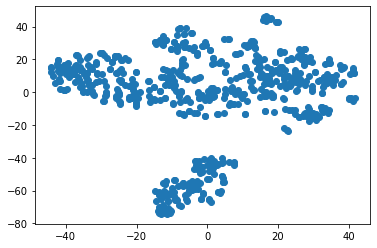

In [16]:
from matplotlib import pyplot as plt
plt.scatter(x[:, 0], x[:, 1])

# plotting

## inhibition as background color, order as grey scale

In [43]:
def plot(num_steps, traj):
    
    import seaborn as sns
    fig = plt.figure()
    ax = fig.add_subplot(111)

    idxs = np.argsort(y)

    sns.kdeplot(
        x[:,0],
        x[:,1],
        shade=False,
        ax=ax,
        color="black",
        alpha=0.5,
        zorder=1,
    )
    
    series = df["series"].fillna(0)
    series_mapping = {
        0: 0,
        "3-aminopyridine-like": 1,
        "quinolones": 2,
        "Ugi": 3,
        "piperazine-chloroacetamide": 4
    }
    series = np.array([series_mapping[x] for x in series])
    
    order = np.arange(len(traj))
    
    ax.scatter(
        x[traj][:, 0],
        x[traj][:, 1],
        c = order / len(traj),
        # s=150 * (1 - np.arange(y.shape[0])[idxs] / y.shape[0]) ** 2,
        # c = series[idxs],
        cmap="gray",
        alpha=0.5,
        zorder=2,
    )
    
    losers = [idx for idx in range(x.shape[0]) if idx not in traj]
    
    ax.scatter(
        x[losers][:, 0],
        x[losers][:, 1],
        c = "black",
        # s=150 * (1 - np.arange(y.shape[0])[idxs] / y.shape[0]) ** 2,
        # c = series[idxs],
        cmap="gray",
        marker="x",
        s=1,
        alpha=0.5,
        zorder=2,
    )

    ax.set_xlabel("TSNE0")
    ax.set_ylabel("TSNE1")

    ax.set_xticks([])
    ax.set_yticks([])

    total_order = np.concatenate(
        [
            order,
            np.array([len(order) for _ in range(x.shape[0] - len(order))])
        ]
    )
    
    from sklearn.neighbors import KNeighborsRegressor
    neigh = KNeighborsRegressor(n_neighbors=10)
    neigh.fit(x, y)
    
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    
    xx, yy = np.meshgrid(
        np.linspace(xmin, xmax, 100),
        np.linspace(ymin, ymax, 100)
    )
    
    z = neigh.predict(
        np.stack(
            [xx, yy],
            axis=2,
        ).reshape([-1, 2])
    ).reshape([100, 100])
    
    ax.contourf(
        xx,
        yy,
        z,
        cmap="coolwarm",
        zorder=0,
    )

/Users/wangy1/anaconda3/envs/pinot/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'BO')

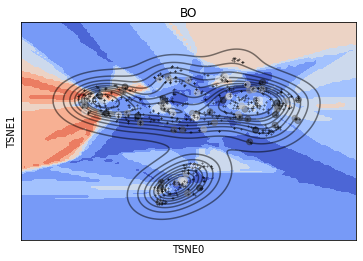

In [46]:
plot(len(traj0), traj0)
plt.title("BO")

/Users/wangy1/anaconda3/envs/pinot/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Humans')

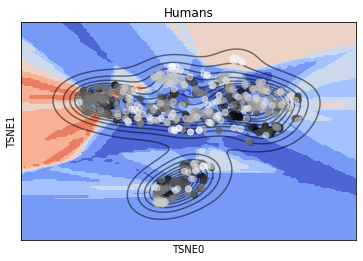

In [45]:
plot(len(traj_human), traj_human)
plt.title("Humans")

## order as background color, inhibition as grey scale

In [50]:
def plot(num_steps, traj):
    
    import seaborn as sns
    fig = plt.figure()
    ax = fig.add_subplot(111)

    idxs = np.argsort(y)

    sns.kdeplot(
        x[:,0],
        x[:,1],
        shade=False,
        ax=ax,
        color="black",
        alpha=0.5,
        zorder=1,
    )
    
    series = df["series"].fillna(0)
    series_mapping = {
        0: 0,
        "3-aminopyridine-like": 1,
        "quinolones": 2,
        "Ugi": 3,
        "piperazine-chloroacetamide": 4
    }
    series = np.array([series_mapping[x] for x in series])
    
    order = np.arange(len(traj))
    
    ax.scatter(
        x[:, 0],
        x[:, 1],
        c = y,
        # s=150 * (1 - np.arange(y.shape[0])[idxs] / y.shape[0]) ** 2,
        # c = series[idxs],
        cmap="gray",
        alpha=0.5,
        zorder=2,
    )

    ax.set_xlabel("TSNE0")
    ax.set_ylabel("TSNE1")

    ax.set_xticks([])
    ax.set_yticks([])

    total_order = np.concatenate(
        [
            order,
            np.array([len(order) for _ in range(x.shape[0] - len(order))])
        ]
    )
    
    from sklearn.neighbors import KNeighborsRegressor
    neigh = KNeighborsRegressor(n_neighbors=10)
    neigh.fit(x, total_order)
    
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    
    xx, yy = np.meshgrid(
        np.linspace(xmin, xmax, 100),
        np.linspace(ymin, ymax, 100)
    )
    
    z = neigh.predict(
        np.stack(
            [xx, yy],
            axis=2,
        ).reshape([-1, 2])
    ).reshape([100, 100])
    
    ax.contourf(
        xx,
        yy,
        z,
        cmap="coolwarm",
        zorder=0,
    )

/Users/wangy1/anaconda3/envs/pinot/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'BO')

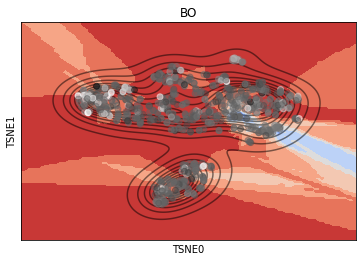

In [51]:
plot(len(traj0), traj0)
plt.title("BO")

/Users/wangy1/anaconda3/envs/pinot/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Humans')

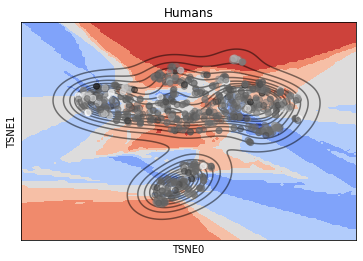

In [52]:
plot(len(traj_human), traj_human)
plt.title("Humans")